In [65]:
exec(open('prepare_data_multiClass.py').read())

Imports termines


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Megaport\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-65-926f0da08711>", line 1, in <module>
    exec(open('prepare_data_multiClass.py').read())
  File "<string>", line 63, in <module>
  File "<string>", line 58, in load_embeddings
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Megaport\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Megaport\anaconda3\lib\genericpath.py", line 19, in exists
    os.stat(path)
OSError: [WinError 123] La syntaxe du nom

KeyboardInterrupt: 

In [5]:
input_dime=600
def ModelBaseline_MultiClass(nb_n1=100,nb_n2=50):
    """Defines the NN baseline.
    Two hidden layers, followed by the output layer. 
    """
    model = Sequential()
    model.add(Dense(nb_n1, activation='sigmoid', input_dim=input_dime))
    model.add(Dense(nb_n2, activation='sigmoid'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy')
    return model






def ModelBaseline_OneVsRest(nb_n1=100,nb_n2=50):
    #l'apprentissage de chaque partie est independant, c'est du vrai multi task
    inputs = Input(shape=(input_dime,))

    x_coh=Dense(nb_n1, activation='sigmoid')(inputs)
    x_hyper=Dense(nb_n1, activation='sigmoid')(inputs)
    x_mero=Dense(nb_n1, activation='sigmoid')(inputs)
    x_random=Dense(nb_n1, activation='sigmoid')(inputs)
    x_syn=Dense(nb_n1, activation='sigmoid')(inputs)
    
    out_pre_coh=Dense(nb_n2, activation='sigmoid')(x_coh)
    out_pre_hyper=Dense(nb_n2, activation='sigmoid')(x_hyper)
    out_pre_mero=Dense(nb_n2, activation='sigmoid')(x_mero)
    out_pre_random=Dense(nb_n2, activation='sigmoid')(x_random)
    out_pre_syn=Dense(nb_n2, activation='sigmoid')(x_syn)
    
    out_coh=Dense(1, activation='sigmoid')(out_pre_coh)
    out_hyper=Dense(1, activation='sigmoid')(out_pre_hyper)
    out_mero=Dense(1, activation='sigmoid')(out_pre_mero)
    out_random=Dense(1, activation='sigmoid')(out_pre_random)
    out_syn=Dense(1, activation='sigmoid')(out_pre_syn)
    

    loss_f='binary_crossentropy'
    model = Model(inputs=[inputs], outputs=[out_coh,out_hyper,out_mero,out_random,out_syn])
    model.compile(optimizer='Adam', loss= [loss_f,loss_f,loss_f,loss_f,loss_f])
    return model



def ModelOneVsRest_SharedPrivate(nb_n1=100,nb_n2=50):
    #l'apprentissage de chaque partie est independant, c'est du vrai multi task
    inputs = Input(shape=(input_dime,))
    
    x_shared1=Dense(nb_n1, activation='sigmoid')(inputs)
    x_shared2=Dense(nb_n1, activation='sigmoid')(inputs)
    

    
    ind_coh=concatenate([inputs,x_shared1])
    ind_hyper=concatenate([inputs,x_shared1])
    ind_mero=concatenate([inputs,x_shared1])
    ind_random=concatenate([inputs,x_shared1])
    ind_syn=concatenate([inputs,x_shared1])
    
    x_coh=Dense(nb_n2, activation='sigmoid')(ind_coh)
    x_hyper=Dense(nb_n2, activation='sigmoid')(ind_hyper)
    x_mero=Dense(nb_n2, activation='sigmoid')(ind_mero)
    x_random=Dense(nb_n2, activation='sigmoid')(ind_random)
    x_syn=Dense(nb_n2, activation='sigmoid')(ind_syn)
    
    out_coh=Dense(1, activation='sigmoid')(x_coh)
    out_hyper=Dense(1, activation='sigmoid')(x_hyper)
    out_mero=Dense(1, activation='sigmoid')(x_mero)
    out_random=Dense(1, activation='sigmoid')(x_random)
    out_syn=Dense(1, activation='sigmoid')(x_syn)
    

    loss_f='binary_crossentropy'
    model = Model(inputs=[inputs], outputs=[out_coh,out_hyper,out_mero,out_random,out_syn])
    model.compile(optimizer='Adam', loss= [loss_f,loss_f,loss_f,loss_f,loss_f])
    return model






def ModelOneVsRest_AllShared(nb_n1=100,nb_n2=50):
    #l'apprentissage de chaque partie est independant, c'est du vrai multi task
    inputs = Input(shape=(input_dime,))
    
    x_shared1=Dense(nb_n1, activation='sigmoid')(inputs)
   
    x_coh=Dense(nb_n2, activation='sigmoid')(x_shared1)
    x_hyper=Dense(nb_n2, activation='sigmoid')(x_shared1)
    x_mero=Dense(nb_n2, activation='sigmoid')(x_shared1)
    x_random=Dense(nb_n2, activation='sigmoid')(x_shared1)
    x_syn=Dense(nb_n2, activation='sigmoid')(x_shared1)
    
    out_coh=Dense(1, activation='sigmoid')(x_coh)
    out_hyper=Dense(1, activation='sigmoid')(x_hyper)
    out_mero=Dense(1, activation='sigmoid')(x_mero)
    out_random=Dense(1, activation='sigmoid')(x_random)
    out_syn=Dense(1, activation='sigmoid')(x_syn)
    

    loss_f='binary_crossentropy'
    model = Model(inputs=[inputs], outputs=[out_coh,out_hyper,out_mero,out_random,out_syn])
    model.compile(optimizer='Adam', loss= [loss_f,loss_f,loss_f,loss_f,loss_f])
    return model


def hier(nb1,nb2):
    inputs=Input(shape=(600,))
    
    first_layer=Dense(nb1,activation='sigmoid')(inputs)
    
    g2=Dense(1,activation='sigmoid')(first_layer)
    
    g3=Dense(1,activation='sigmoid')(first_layer)
    
    c1=Dense(nb2,activation='sigmoid')(first_layer)
    
    g0=Dense(1,activation='sigmoid')(c1)
    
    c2=Dense(nb2,activation='sigmoid')(c1)

    g1=Dense(1,activation='sigmoid')(c2)
    
    g4=Dense(1,activation='sigmoid')(c2)
    
    
    loss_f='binary_crossentropy'
    model = Model(inputs=[inputs], outputs=[g0,g1,g2,g3,g4])
    model.compile(optimizer='Adam', loss= [loss_f,loss_f,loss_f,loss_f,loss_f])
    return model

In [28]:
name_str=['MultiClass','OR','AS','ORSP','HIER']

name_models=[ModelBaseline_MultiClass,ModelBaseline_OneVsRest,ModelOneVsRest_AllShared,ModelOneVsRest_SharedPrivate,hier]

nb_n1=['10','50','100','200','300','500','1000','1500']
nb_n2=['5','20','50','100','150','200','300','500']


result=[]
for nb1 in nb_n1:
	for nb2 in nb_n2:
		#print(nb1,nb2)
		for i in range(len(name_str)):
			model=name_models[i](nb1,nb2)
			a=model.count_params()
			result.append([nb1,nb2,name_str[i],a])


df=pd.DataFrame(result,columns=['nb1','nb2','modèle','nb_params'])


In [29]:
df

,nb1,nb2,modèle,nb_params
0,10,5,ModelBaseline_MultiClass,6095
1,10,5,ModelBaseline_OneVsRest,30355
2,10,5,ModelOneVsRest_AllShared,6315
3,10,5,ModelOneVsRest_SharedPrivate,21315
4,10,5,hier,6135
...,...,...,...,...
315,1500,500,ModelBaseline_MultiClass,1654505
316,1500,500,ModelBaseline_OneVsRest,8262505
317,1500,500,ModelOneVsRest_AllShared,4656505
318,1500,500,ModelOneVsRest_SharedPrivate,6156505


In [9]:
max(df['nb_params'])

1128005

In [17]:
mdl = name_str[0]

In [25]:
max(df[df['modèle']==mdl]['nb_params'])

802205

In [18]:
np.argmax(df[df['modèle']==mdl]['nb_params'])

41

In [26]:
df[df['modèle']==mdl][['nb1','nb2','nb_params']].iloc[41]

nb1            1000
nb2             200
nb_params    802205
Name: 205, dtype: object

In [14]:
for mdl in name_str:
    print(max(df[df['modèle']==mdl]['nb_params']))
    df

401705

In [35]:
df[df['modèle']=='hier'].values

array([['10', '5', 'hier', 6135],
       ['10', '20', 'hier', 6735],
       ['10', '50', 'hier', 9285],
       ['10', '100', 'hier', 17535],
       ['10', '150', 'hier', 30785],
       ['10', '200', 'hier', 49035],
       ['10', '300', 'hier', 100535],
       ['10', '500', 'hier', 263535],
       ['50', '5', 'hier', 30455],
       ['50', '20', 'hier', 31655],
       ['50', '50', 'hier', 35405],
       ['50', '100', 'hier', 45655],
       ['50', '150', 'hier', 60905],
       ['50', '200', 'hier', 81155],
       ['50', '300', 'hier', 136655],
       ['50', '500', 'hier', 307655],
       ['100', '5', 'hier', 60855],
       ['100', '20', 'hier', 62805],
       ['100', '50', 'hier', 68055],
       ['100', '100', 'hier', 80805],
       ['100', '150', 'hier', 98555],
       ['100', '200', 'hier', 121305],
       ['100', '300', 'hier', 181805],
       ['100', '500', 'hier', 362805],
       ['200', '5', 'hier', 121655],
       ['200', '20', 'hier', 125105],
       ['200', '50', 'hier', 133355],

In [42]:
dic_params={'MultiClass':[(10,5),(50,5),(200,50),(300,200),(500,500)],
           'OR': [(10,5),(10,100),(50,5),(100,20),(200,20)],
           'AS': [(10,5),(50,20),(200,50),(300,20),(500,100)],
           'ORSP': [(10,5),(50,5),(100,20),(200,20),(500,50)],
           'Hier': [(10,5),(50,5),(200,5),(300,100),(500,300)]}

In [54]:
def train_model_softmax(name_model,epochs):
    model=name_model
    
    model.fit(xtrain, [ytrain.transpose()[0],ytrain.transpose()[1],ytrain.transpose()[2]
                       ,ytrain.transpose()[3],ytrain.transpose()[4]],
                epochs=epochs, validation_data=(xvalid, [yvalid.transpose()[0],yvalid.transpose()[1],yvalid.transpose()[2]
                       ,yvalid.transpose()[3],yvalid.transpose()[4]]),  verbose=False, callbacks=[EarlyStopping(patience=5)])
   
    return model
def func_preds_max_softmax(model,xtest):
    preds = model.predict(xtest, verbose=False)
    preds_pre=[]

    for i in range(len(preds[0])):
        a=np.zeros(5)
        b=[]
        for j in range(5):
            b.append(preds[j][i])
        a[np.argmax(b)]=1
        preds_pre.append(a)
    preds_all_max=[list_cat[np.argmax(l)] for l in preds_pre]

    return preds_all_max

def create_metrics(y_test,y_pred):
    y_test=[list_cat[np.argmax(l)] for l in y_test]
    cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) # Create CM From Data
    overall_stats=[cm.overall_stat['F1 Micro'],cm.overall_stat['F1 Macro'],cm.overall_stat['ACC Macro'],cm.overall_stat['AUNU'],cm.overall_stat['AUNP']]
    df_overall=pd.DataFrame([overall_stats],columns=['F1 Micro' ,'F1 Macro','ACC MACRO','AUNU','AUNP'])
    
    return df_overall
def main_softmax(name_model,xtest,epochs):
    model=train_model_softmax(name_model,epochs)
    preds_all_max=func_preds_max_softmax(model,xtest)
    df_overall=create_metrics(ytest,preds_all_max)
    #df_metrics_softmax=create_metrics(ytest,preds_all_softmax)
    return df_overall


def train_model_multiClass(name_model,epochs):
    model=name_model
    model.fit(xtrain, ytrain,
                epochs=epochs, validation_data=(xvalid, yvalid),  verbose=False, callbacks=[EarlyStopping(patience=5)])
    return model
def func_preds(model,xtest):
    preds = model.predict(xtest, verbose=False)
    preds_all=[list_cat[np.argmax(l)] for l in preds]
    return preds_all

def main_multi(name_model,xtest,epochs):
    model=train_model_multiClass(name_model,epochs)
    preds_all=func_preds(model,xtest)
    df_overall=create_metrics(ytest,preds_all)
    #df_metrics_softmax=create_metrics(ytest,preds_all_softmax)
    return df_overall

In [61]:
df_out=pd.DataFrame()

In [60]:
df_metrics=main_softmax(ModelBaseline_OneVsRest(1,1),xtest,1)
df_metrics['model']='OR' 
df_metrics['type_parm']='Faible'


NameError: name 'df_out' is not defined

In [62]:
df_out=df_out.append(df_metrics)

In [63]:
df_metrics=main_multi(ModelBaseline_MultiClass(1,1),xtest,1)
df_metrics['model']='MultiClass' 
df_metrics['type_parm']='Faible'
df_out=df_out.append(df_metrics)

In [64]:
df_out

,F1 Micro,F1 Macro,ACC MACRO,AUNU,AUNP,model,type_parm
0,0.497331,0.134011,0.798932,0.500071,0.499903,OR,Faible
0,0.497966,0.132971,0.799187,0.500000,0.500000,MultiClass,Faible


In [56]:
name_str=['MultiClass','OR','AS','ORSP','HIER']
type_params=['Très Faible','Faible','Moyen','Fort','Très Fort']
name_models=[ModelBaseline_MultiClass,ModelBaseline_OneVsRest,ModelOneVsRest_AllShared,ModelOneVsRest_SharedPrivate,hier]
dic_params={'MultiClass':[(10,5),(50,5),(200,50),(300,200),(500,500)],
           'OR': [(10,5),(10,100),(50,5),(100,20),(200,20)],
           'AS': [(10,5),(50,20),(200,50),(300,20),(500,100)],
           'ORSP': [(10,5),(50,5),(100,20),(200,20),(500,50)],
           'Hier': [(10,5),(50,5),(200,5),(300,100),(500,300)]}

In [ ]:
df_out=pd.DataFrame()
for i in range(len(name_str)):
    print(name_str[i])
    if name_str[i]=='MultiClass':
        for j in range(len(type_params)):
            df_metrics=main_multi(name_model(dic_params[name_str[i][0]],dic_params[name_str[i][1]]),xtest,5)
            df_metrics['model']=name_str[i]
        
            df_metrics['type_parm']=type_params[j]
            df_out=df_out.append(df_metrics)
    else : 
        
        for j in range(len(types_params)):
            df_metrics=main_softmax(name_model(dic_params[name_str[i][0]],dic_params[name_str[i][1]]),xtest,5)
            df_metrics['model']=name_str[i]
        
            df_metrics['type_parm']=type_params[j]
            df_out=df_out.append(df_metrics)
df_out.to_csv('output_final.csv')
    

In [67]:
df_out

,Unnamed: 0,F1 Micro,F1 Macro,ACC MACRO,AUNU,AUNP,model,time,type_parm
0,0,0.542196,0.301737,0.816878,0.564854,0.578487,MultiClass,8.076291,Très Faible
1,0,0.571937,0.422627,0.828775,0.623283,0.624041,MultiClass,8.371686,Faible
2,0,0.583757,0.478234,0.833503,0.655258,0.656729,MultiClass,9.359772,Moyen
3,0,0.582994,0.471950,0.833198,0.653508,0.652482,MultiClass,12.858982,Fort
4,0,0.584011,0.465543,0.833604,0.646456,0.651234,MultiClass,18.443300,Très Fort
5,0,0.566599,0.439334,0.826640,0.634678,0.632313,OR,18.874153,Très Faible
6,0,0.570031,0.461781,0.828012,0.648734,0.643114,OR,20.725348,Faible
7,0,0.576258,0.473181,0.830503,0.653006,0.651836,OR,20.411268,Moyen
8,0,0.590493,0.480975,0.836197,0.656890,0.658425,OR,21.226876,Fort
9,0,0.589095,0.481044,0.835638,0.658352,0.658917,OR,23.672305,Très Fort


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
df_out=pd.read_csv('output_finalTweets_5C.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'output_finalTweets_5C.csv'

In [4]:
list(df_out[df_out['model']=='MultiClass']['F1 Micro'].values)[0:-1]

[0.2616555661274976, 0.2730732635585157, 0.3539486203615604, 0.19790675547098]

In [47]:
def make_ax(df_out,ax):
    ax.plot(x,df_out[df_out['model']=='MultiClass']['F1 Micro'],color='black',linestyle='--',marker='' ,label='MultiClass')
    ax.plot(x,df_out[df_out['model']=='OR']['F1 Micro'], label='OneVsRest',linestyle=':',color='brown',marker='')
    ax.plot(x,df_out[df_out['model']=='HIER']['F1 Micro'], label='Hierarchical',color='gray',marker='',linestyle='-.')
    ax.plot(x,df_out[df_out['model']=='AS']['F1 Micro'], label='OneVsRest Tout-Partagé',color='darkgray',linestyle=':')
    ax.plot(x,df_out[df_out['model']=='ORSP']['F1 Micro'], label='OneVsRest Partagé-Privé',color='black',marker ='')
    ax.set_ylabel('F1 Micro') 
    ax.grid(True)
    #ax.legend()
    return ax

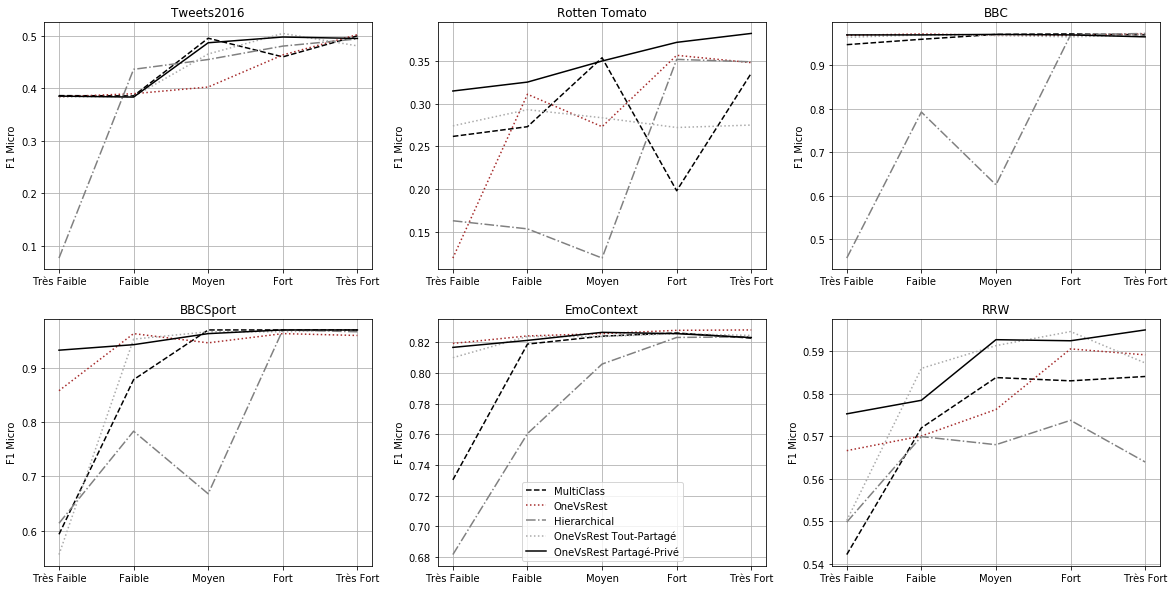

In [48]:
x = ['Très Faible','Faible','Moyen','Fort','Très Fort']

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3, figsize=(20,10))  # Create a figure and an axes.
ax1=make_ax(pd.read_csv('output_finalTweets_5C.csv'),ax1)
ax1.set_title('Tweets2016')
ax2=make_ax(pd.read_csv('output_finalIMDB.csv'),ax2)
ax2.set_title('Rotten Tomato')
ax3=make_ax(pd.read_csv('output_finalBBC.csv'),ax3)
ax3.set_title('BBC')
ax4=make_ax(pd.read_csv('output_finalBBCSport.csv'),ax4)
ax4.set_title('BBCSport')
ax5=make_ax(pd.read_csv('output_finalLinkedin.csv'),ax5)
ax5.set_title('EmoContext')
ax6=make_ax(pd.read_csv('output_final.csv'),ax6)
ax6.set_title('RRW')


lines, labels = ax1.get_legend_handles_labels()
    
ax5.legend(lines, labels, loc = 'lower center')


#ax.set_xlabel('x label')  # Add an x-label to the axes.

